## 4.9 Intro to Data Visualization with Python (READING EXERCISES)

### The script contain the following points:

1)Creating bar charts

2)Exporting charts

3)Creating histograms and scatterplots / Finding issues in visualization (This is an example but, its better to fix issues in cleaning stage of analysis rather than in visualization stage!!!)

4)Fixing histogram (removing outliers) and exporting

5)Creating Line Charts / Sampling Data

## Importing libraries to computer (Pandas, NumPy, OS, Matplotlib, Seaborn, and Scipy)

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing 'new_ords_prods_merge' dataset 

In [2]:
# Creating a data importing shortcut called 'path' for the Instacart folder to make importing data easier and cleaner
path =r'/Users/drewsmith/Desktop/01-2023 Instacart Basket Analysis'

In [7]:
# Utilizing the created 'path' shortcut to import the 'new_ords_prods_merge' dataset 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'new_ords_prods_merge.pkl'))

In [8]:
ords_prods_merge.shape

(32404859, 25)

In [9]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_user_price,median_days_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer


## 01. Creating bar charts

<AxesSubplot:>

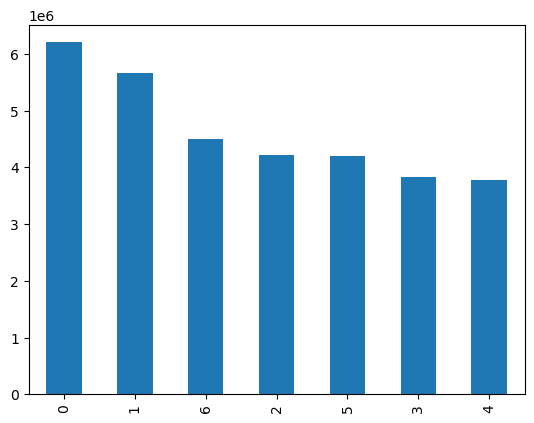

In [10]:
# Creates bar chart through matplotlib for 'orders_day_of_week' column by frequency (and ordered from most frequent to least frequent)
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

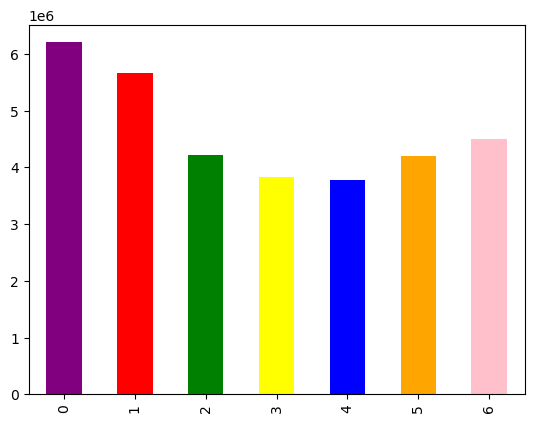

In [14]:
# Creates bar chart through matplotlib for 'orders_day_of_week' column by frequency (and ordered by day of week)(with colors)
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'green', 'yellow' , 'blue', 'orange', 'pink'])

## 02. Exporting charts

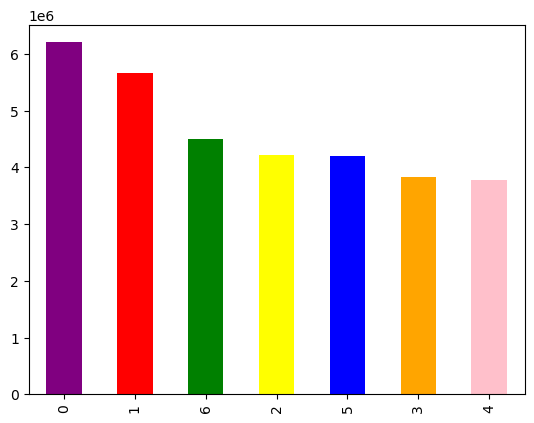

In [15]:
# Assigns barchart an an object 'bar' which can later be used for exporting
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'green', 'yellow' , 'blue', 'orange', 'pink'])

In [16]:
# Exports the chart as a png in the 'visualizations' folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## 03. Creating histograms and scatterplots / Finding issues in visualization (better to fix issues in cleaning stage of analysis rather than in visualization stage!!!)

<AxesSubplot:ylabel='Frequency'>

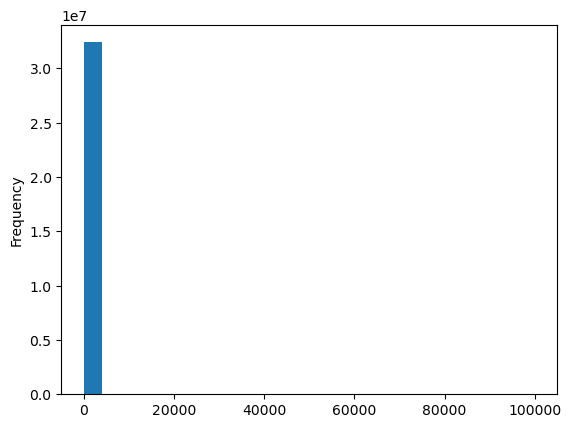

In [17]:
# Creates histogram for 'prices' column by frequency
ords_prods_merge['prices'].plot.hist(bins = 25)

### -- There should be 25 bars and there is likely an error in the data so a check should be conducted

In [21]:
# There is clearly an error on the max price
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
ords_prods_merge['prices'].mean()

11.980225638467232

In [19]:
ords_prods_merge['prices'].median()

7.4

In [20]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

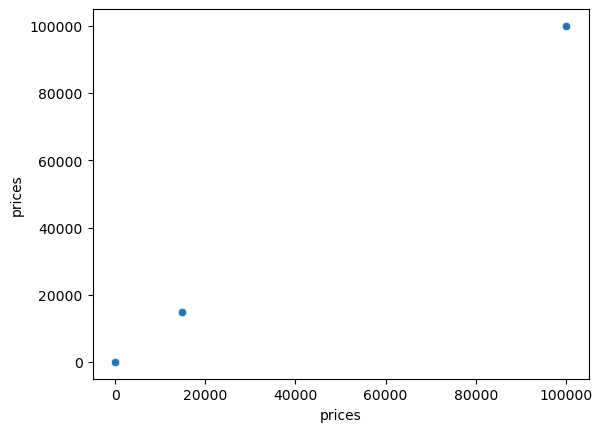

In [22]:
# Creates scatterplot to visualize the distribution of datapoints, and shows a clear outliers on the top right and middle
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [25]:
# Shows a list of products that are priced over 100 dollars since we assume anything over 100 is considered an outlier
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_user_price,median_days_prior_order,order_frequency_flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regular days,Most orders,40,Regular customer,High spender,108.648299,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regular days,Most orders,40,Regular customer,High spender,108.648299,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regular days,Average orders,4,New customer,High spender,1154.792308,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Busiest days,Average orders,4,New customer,High spender,1154.792308,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,High spender,114.426619,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,High spender,1106.743956,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,High spender,1106.743956,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,High spender,451.153540,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,High spender,1178.381871,12.0,Regular customer


In [24]:
# Doesn't assign any options to the max number of columns so the entire set of columns in the dataset can be displayed
pd.options.display.max_columns = None

## 04. Fixing histogram (removing outliers) and exporting

In [26]:
# Replaces any prices over 100 as NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [27]:
# Now the max of the datast is realistic and won't negatively affect analysis
ords_prods_merge['prices'].max()

25.0

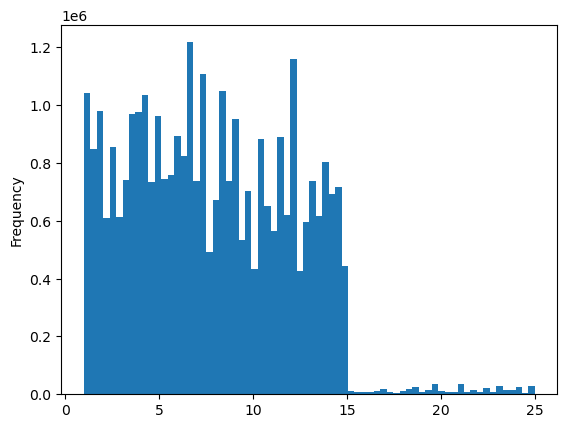

In [29]:
# Creates histogram for 'prices' column by frequency and now under an object name
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [30]:
# Exports the chart as a png in the 'visualizations' folder
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## 05. Creating Line Charts / Sampling Data

In [31]:
# Creates a random set of numbers with the 'seed' function with a following number to recreate the exact same set of numbers in the future. Then it uses a 70/30 split(0.7)-- Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio. Also, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [32]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [33]:
# Creates 10 random numbers, but in the code above, the '.rand(len(ords_prods_merge)) creates random numbers for the entire dataset
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

### So, to recap each piece of the split code, you need to:

1)Set the seed for the random number generator.

2)Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.

3)Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).

4)Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [34]:
# Creates a list holding true/false values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [35]:
# Stores 70% of the sample in the dataframe called 'big'
big = ords_prods_merge[dev]

In [36]:
# Stores 30% of the sample in the dataframe called 'small'
small = ords_prods_merge[~dev]

In [37]:
# Shows count of rows in dataset
len(ords_prods_merge)

32404859

In [38]:
# When adding the 70/30 split, it should equal the same amount of rows as the entire dataset
len(big) + len(small)

32404859

In [39]:
# Creates a new dataframe with certain columns from the 'small' subset from above (you might only need certain columns for a visualization like a line chart)
df_2 = small[['orders_day_of_week','prices']]

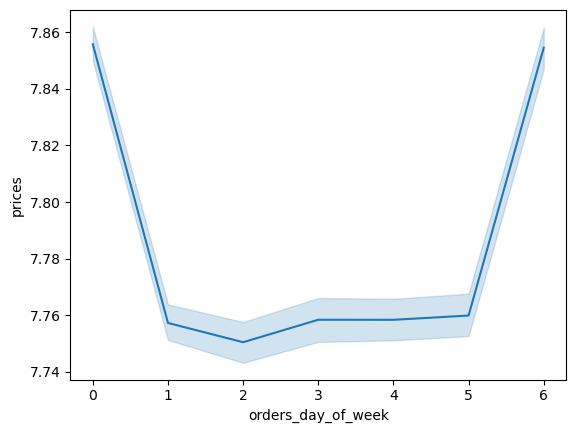

In [40]:
# Creates line chart with newly created dataframe and assigns the x and y axis values
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')